<a href="https://colab.research.google.com/github/Camilarcila/Entregas-de-proyectos_Camila-Arcila/blob/main/01%20-%20Exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pubg Finish Placement Prediction

# 1. Importar datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/AlexBedCarIA/IA_project_Alexander_Bedoya/main/datos_proyecto.csv'
d = pd.read_csv(url)

In [ ]:
data = d.copy()

# 2. Información del dataset

In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1282317f93861e,62b902e6760601,7c216eb5497dc7,0,5.0,52.59,0,0,11,55,...,0,0.0,0,0.0,0,0,1795.00,5,0,0.6800
1,997b9dce1c1dc2,b13038d64e7ecc,0d8c21cad71e07,0,NaN,32.34,0,0,0,91,...,0,0.0,0,0.0,0,0,6.84,1,1487,0.0741
2,3a3b05231db7c3,a55faee9b1b9b3,182134b302ae09,0,NaN,196.00,2,0,1,36,...,1,0.0,0,0.0,0,0,320.60,1,0,0.3696
3,c74d6a0bfb2a3f,90088b32384502,2d27d88ec80c11,0,0.0,0.00,0,0,0,60,...,0,0.0,0,0.0,0,0,39.39,2,1453,0.5532
4,79fca278a83595,30a84e17a06710,03457ad31090f2,1,8.0,1282.00,8,7,2,1,...,0,1652.0,0,0.0,0,0,3159.00,5,1499,1.0000


In [ ]:
data.shape

(200000, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               200000 non-null  object 
 1   groupId          200000 non-null  object 
 2   matchId          200000 non-null  object 
 3   assists          200000 non-null  int64  
 4   boosts           200000 non-null  int64  
 5   damageDealt      183600 non-null  float64
 6   DBNOs            200000 non-null  int64  
 7   headshotKills    200000 non-null  int64  
 8   heals            200000 non-null  int64  
 9   killPlace        200000 non-null  int64  
 10  killPoints       200000 non-null  int64  
 11  kills            200000 non-null  int64  
 12  killStreaks      200000 non-null  int64  
 13  longestKill      183000 non-null  float64
 14  matchDuration    200000 non-null  int64  
 15  matchType        200000 non-null  object 
 16  maxPlace         200000 non-null  int6

In [ ]:
g = data.isnull().sum()
g[g!=0]

damageDealt     16400
longestKill     17000
walkDistance    19200
dtype: int64

In [ ]:
df = data.copy()

In [ ]:
ganadores = df[df['winPlacePerc']==1].winPlacePerc.count()
pos_mayor_prom = df[df['winPlacePerc']>df['winPlacePerc'].mean()].winPlacePerc.count()
total = df.shape[0]

# 3. Explorar variable a predecir (winPLacePerc)

3.1 Distribución de la variable a predecir (winPlacePerc)

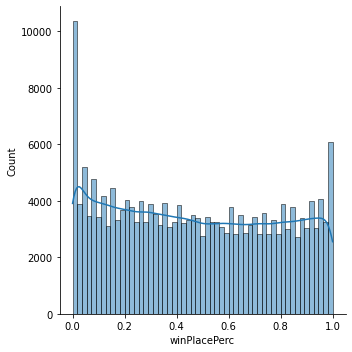

In [ ]:
#Distribución de la variable objetivo
sns.displot(data=df, x='winPlacePerc', kde=True)
plt.show()

In [ ]:
print('Coeficiente de asimetría de la variable winPlacePerc:', df['winPlacePerc'].skew())

Coeficiente de asimetría de la variable winPlacePerc: 0.09834821039279806


El coeficiente de asimetría indica asimetría positiva, es decir, las observaciones se reúnen más en la parte izquierda de las medidas de tendencia central, aunque no es muy marcada.

In [ ]:
df['winPlacePerc'].quantile(0.5)

0.4583

In [ ]:
win_prom = df['winPlacePerc'].mean()
print('El promedio de la ubicación final en percentil es:', win_prom)

El promedio de la ubicación final en percentil es: 0.4725141185


# 4. Explorar variables

**4.1 Resumen numérico de variables numéricas**

In [ ]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
assists,200000.0,0.234545,0.588001,0.0,0.0,0.0000,0.00000,13.0
boosts,200000.0,1.105475,1.712719,0.0,0.0,0.0000,2.00000,17.0
damageDealt,183600.0,130.593760,171.087616,0.0,0.0,83.9200,186.00000,5793.0
DBNOs,200000.0,0.656980,1.140835,0.0,0.0,0.0000,1.00000,28.0
headshotKills,200000.0,0.226995,0.610098,0.0,0.0,0.0000,0.00000,39.0
heals,200000.0,1.371345,2.684493,0.0,0.0,0.0000,2.00000,46.0
killPlace,200000.0,47.549085,27.464253,1.0,24.0,47.0000,71.00000,100.0
killPoints,200000.0,504.202450,627.230793,0.0,0.0,0.0000,1170.00000,2126.0
kills,200000.0,0.925805,1.564906,0.0,0.0,0.0000,1.00000,57.0
killStreaks,200000.0,0.545140,0.712001,0.0,0.0,0.0000,1.00000,13.0


In [ ]:
final_no_damage = df[df['damageDealt']==0].shape[0]
print('La proporción de jugadores que terminan la partida sin hacer daño es de:', (final_no_damage/total)*100, '%')

La proporción de jugadores que terminan la partida sin hacer daño es de: 25.387500000000003 %


In [ ]:
final_no_kill = df[df['kills']==0].shape[0]
print('La proporción de jugadores que terminan la partida sin hacer muertes es de:', (final_no_kill/total)*100, '%')

La proporción de jugadores que terminan la partida sin hacer muertes es de: 56.779999999999994 %


In [ ]:
win_no_damage = df[(df['winPlacePerc']==1) & (df['damageDealt']==0)].shape[0]
print("Del total de ganadores, la proporción jugadores que ganan la partida sin hacer daño:", (win_no_damage/ganadores)*100, '%')

Del total de ganadores, la proporción jugadores que ganan la partida sin hacer daño: 3.1726768377253816 %


In [ ]:
win_no_kills = df[(df['winPlacePerc']==1) & (df['kills']==0)].shape[0]
print("Del total de ganadores, la proporción jugadores que ganan la partida sin hacer muertes:", (win_no_kills/ganadores)*100, '%')

Del total de ganadores, la proporción jugadores que ganan la partida sin hacer muertes: 13.072122052704577 %


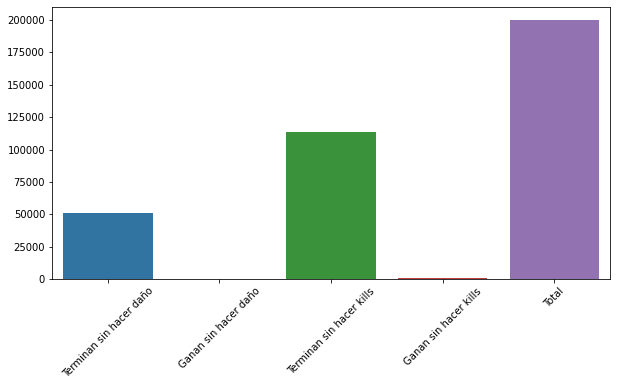

In [ ]:
barras = [final_no_damage, win_no_damage, final_no_kill, win_no_kills, total]
labelsb = ['Terminan sin hacer daño', 'Ganan sin hacer daño', 'Terminan sin hacer kills', 'Ganan sin hacer kills', 'Total']
plt.figure(figsize=(10,5))
sns.barplot(x=labelsb, y=barras)
plt.xticks(rotation=45)
plt.show()

**4.2 Variable Kills**

4.2.1 Boxplot kilss vs winPLacePerc

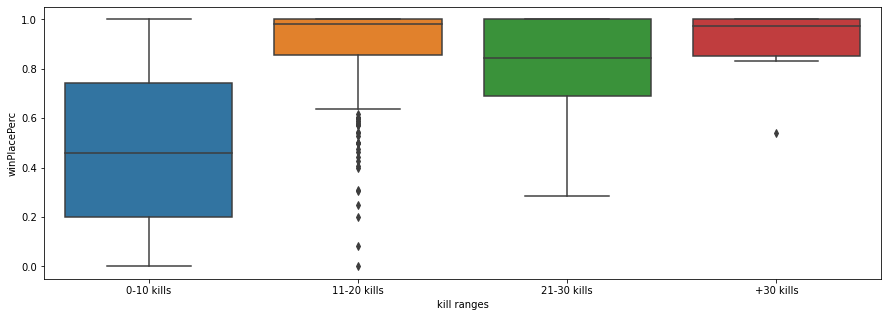

In [ ]:
df2 = df.copy()
min_kill = df2['kills'].min()
max_kill = df2['kills'].max()
rangos_kills = [-1, 10, 20, 30, 100]
nombre_rangos_kills = ['0-10 kills', '11-20 kills', '21-30 kills', '+30 kills']
df2['kill ranges'] = pd.cut(df2['kills'], rangos_kills, labels=nombre_rangos_kills)
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x=df2['kill ranges'], y='winPlacePerc')
plt.show()

4.2.2 Gráfico de pastel kilss vs winPLacePerc

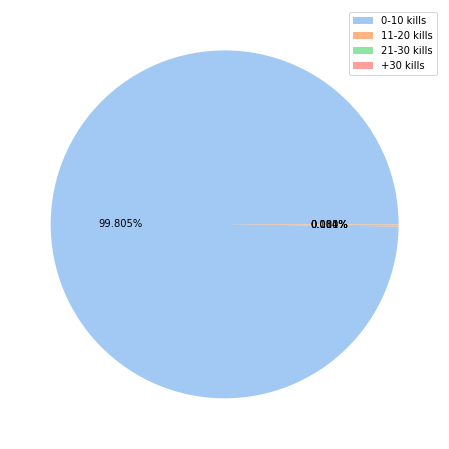

In [ ]:
plt.figure(figsize=(15, 8))
groupby_kills = df2['kills'].groupby(df2['kill ranges']).count()
labels_kills = groupby_kills.index
colors_kills = sns.color_palette('pastel')[0:6]
plt.pie(groupby_kills, colors = colors_kills, autopct='%.3f%%')
plt.legend(labels_kills)
plt.show()

**4.3 Variables walkDistance y swimDistance**

4.3.1 Relación entre walkDistances y swimDistance y la variable a predecir winPLacePerc

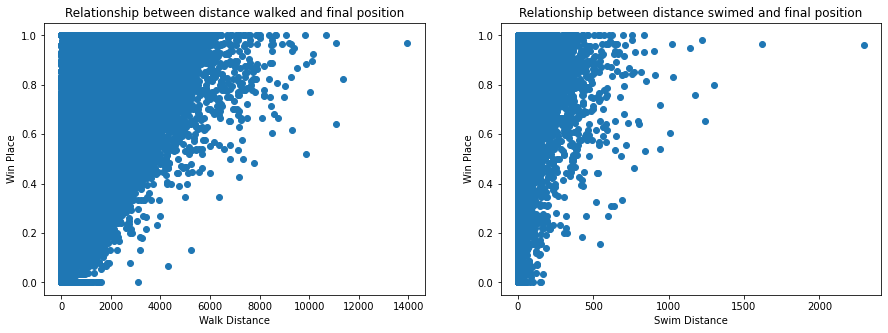

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x=df['walkDistance'], y=df['winPlacePerc'])
ax[0].set(xlabel='Walk Distance', ylabel='Win Place', title='Relationship between distance walked and final position')
ax[1].scatter(x=df['swimDistance'], y=df['winPlacePerc'])
ax[1].set(xlabel='Swim Distance', ylabel='Win Place', title='Relationship between distance swimed and final position')
plt.show()

In [ ]:
sup_prom_sincam = df[(df['winPlacePerc']>df['winPlacePerc'].mean()) & (df['walkDistance']==0)].shape[0]
print('La proporción de jugadores que quedan en posiciones finales superiores al promedio sin caminar es de:', (sup_prom_sincam/total)*100, '%')

La proporción de jugadores que quedan en posiciones finales superiores al promedio sin caminar es de: 0.062 %


In [ ]:
ganan_sincam1000 = df[(df['winPlacePerc']==1) & (df['walkDistance']<1000)].shape[0]
print('La proporción de jugadores que ganan la partida sin caminar más de mil metros es:', (ganan_sincam1000/total)*100, '%')

La proporción de jugadores que ganan la partida sin caminar más de mil metros es: 0.11449999999999999 %


In [ ]:
ganan_sincam = df[(df['winPlacePerc']==1) & (df['walkDistance']==0)].shape[0]
print('La proporción de jugadores que ganan la partida sin caminar es de:', (ganan_sincam/total)*100, '%')

La proporción de jugadores que ganan la partida sin caminar es de: 0.0155 %


In [ ]:
sup_prom_sinnad = df[(df['winPlacePerc']>df['winPlacePerc'].mean()) & (df['swimDistance']==0)].shape[0]
print('La proporción de jugadores que quedan en posiciones finales superiores al promedio sin nadar es de:', (sup_prom_sinnad/total)*100, '%')

La proporción de jugadores que quedan en posiciones finales superiores al promedio sin nadar es de: 42.803999999999995 %


In [ ]:
ganan_sinnad = df[(df['winPlacePerc']==1) & (df['swimDistance']==0)].shape[0]
print('La proporción de jugadores que ganan la partida sin nadar es de:', (ganan_sinnad/total)*100, '%')

La proporción de jugadores que ganan la partida sin nadar es de: 2.436 %


**4.4 Variables boosts y heals**

4.4.1 Relación entre boosts y heals y la variable a predecir winPLacePerc

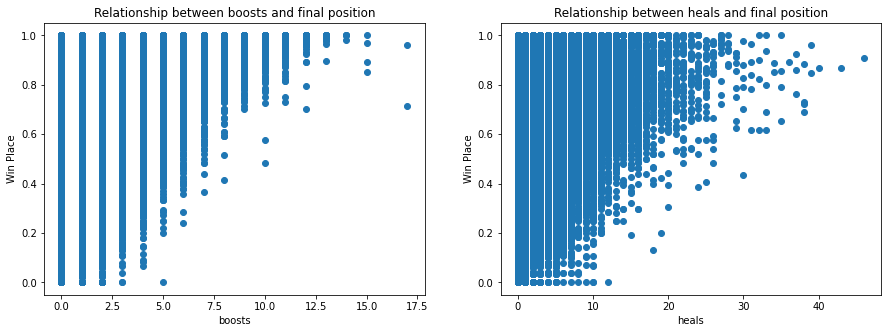

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x=df['boosts'], y=df['winPlacePerc'])
ax[0].set(xlabel='boosts', ylabel='Win Place', title='Relationship between boosts and final position')
ax[1].scatter(x=df['heals'], y=df['winPlacePerc'])
ax[1].set(xlabel='heals', ylabel='Win Place', title='Relationship between heals and final position')
plt.show()

In [ ]:
print('En promedio, el número de refuerzo utilizados por los ganadores de las partidas es: ', df[df['winPlacePerc']==1].boosts.mean())

En promedio, el número de refuerzo utilizados por los ganadores de las partidas es:  3.884882108183079


In [ ]:
ganan_sin_ref = df[(df['boosts']==0) & (df['winPlacePerc']==1)].shape[0]
print('La proporción de jugadores que ganan la partida sin usar ningún refuerzo es de:', (ganan_sin_ref/total)*100, '%')

La proporción de jugadores que ganan la partida sin usar ningún refuerzo es de: 0.21450000000000002 %


In [ ]:
ganan_3_ref = df[(df['boosts']<5) & (df['winPlacePerc']==1)].shape[0]
print('La proporción de jugadores que ganan la partida usando menos de 3 refuerzos es de:', (ganan_3_ref/total)*100, '%')

La proporción de jugadores que ganan la partida usando menos de 3 refuerzos es de: 1.809 %


In [ ]:
print('En promedio, el número de curaciones utilizadas por los ganadores de las partidas es:', df[df['winPlacePerc']==1].heals.mean())

En promedio, el número de curaciones utilizadas por los ganadores de las partidas es: 3.3776005547850207


In [ ]:
ganan_sin_cur = df[(df['heals']==0) & (df['winPlacePerc']==1)].shape[0]
print('La proporción de jugadores que ganan la partida sin usar ninguna curación es de:', (ganan_sin_cur/total)*100, '%')

La proporción de jugadores que ganan la partida sin usar ninguna curación es de: 0.469 %


In [ ]:
ganan_sin_cur = df[(df['heals']==0) & (df['winPlacePerc']==1)].shape[0]
print('La proporción de jugadores que ganan la partida sin usar ninguna curación es de:', (ganan_sin_cur/total)*100, '%')

**4.5 Variables rideDistance, roadKills y vehicleDestroys**

4.5.1 Relaciones entre rideDistance, roadKills y vehicleDestroys y la variable a predecir winPlacePerc.

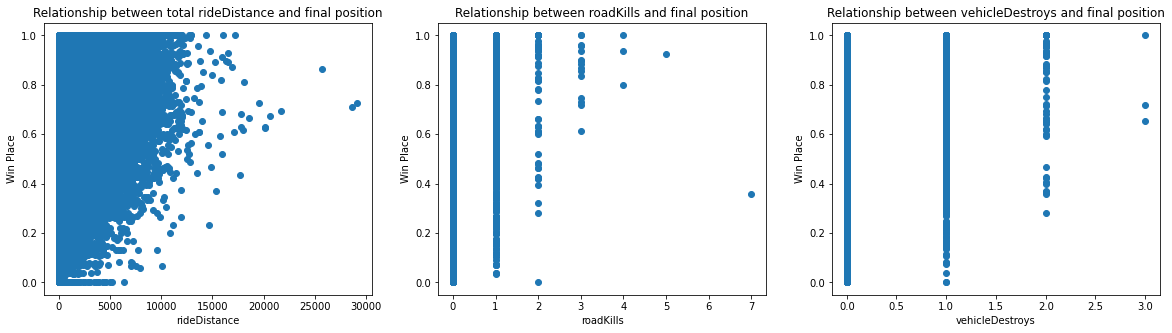

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].scatter(x=df['rideDistance'], y=df['winPlacePerc'])
ax[0].set(xlabel='rideDistance', ylabel='Win Place', title='Relationship between total rideDistance and final position')
ax[1].scatter(x=df['roadKills'], y=df['winPlacePerc'])
ax[1].set(xlabel='roadKills', ylabel='Win Place', title='Relationship between roadKills and final position')
ax[2].scatter(x=df['vehicleDestroys'], y=df['winPlacePerc'])
ax[2].set(xlabel='vehicleDestroys', ylabel='Win Place', title='Relationship between vehicleDestroys and final position')
plt.show()

**4.6 Variable matchType**

4.6.1 Conteo de la variable matchtype

In [ ]:
df['matchType'].value_counts()

squad-fpp           79132
duo-fpp             44844
squad               27909
solo-fpp            24313
duo                 14135
solo                 8102
normal-squad-fpp      727
crashfpp              272
normal-duo-fpp        254
flaretpp              139
normal-solo-fpp        92
flarefpp               23
normal-squad           22
crashtpp               15
normal-solo            15
normal-duo              6
Name: matchType, dtype: int64

4.6.2 Distribución de la variable macthType

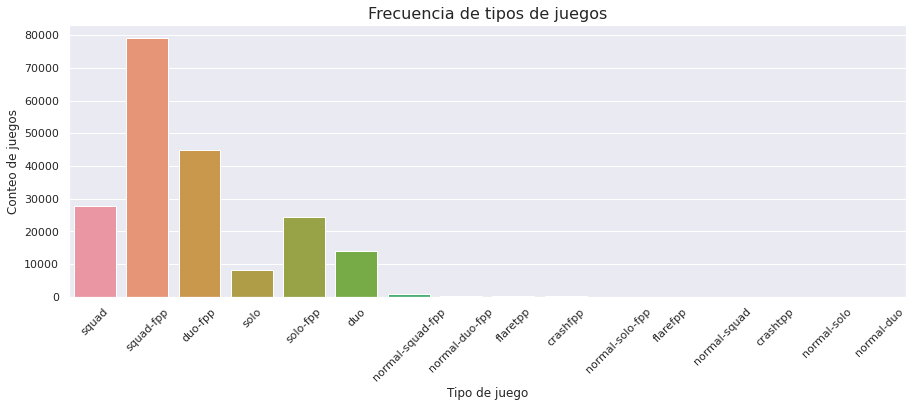

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
match_types = df['matchType'].unique()
sns.countplot(x = 'matchType', data = df).set_title("Frecuencia de tipos de juegos", fontsize=16)
ax.set_xticklabels(match_types)
plt.xlabel('Tipo de juego', fontsize=12)
plt.ylabel('Conteo de juegos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**4.7 Variables restantes**

4.7.1 Relaciones entre las variables restantes

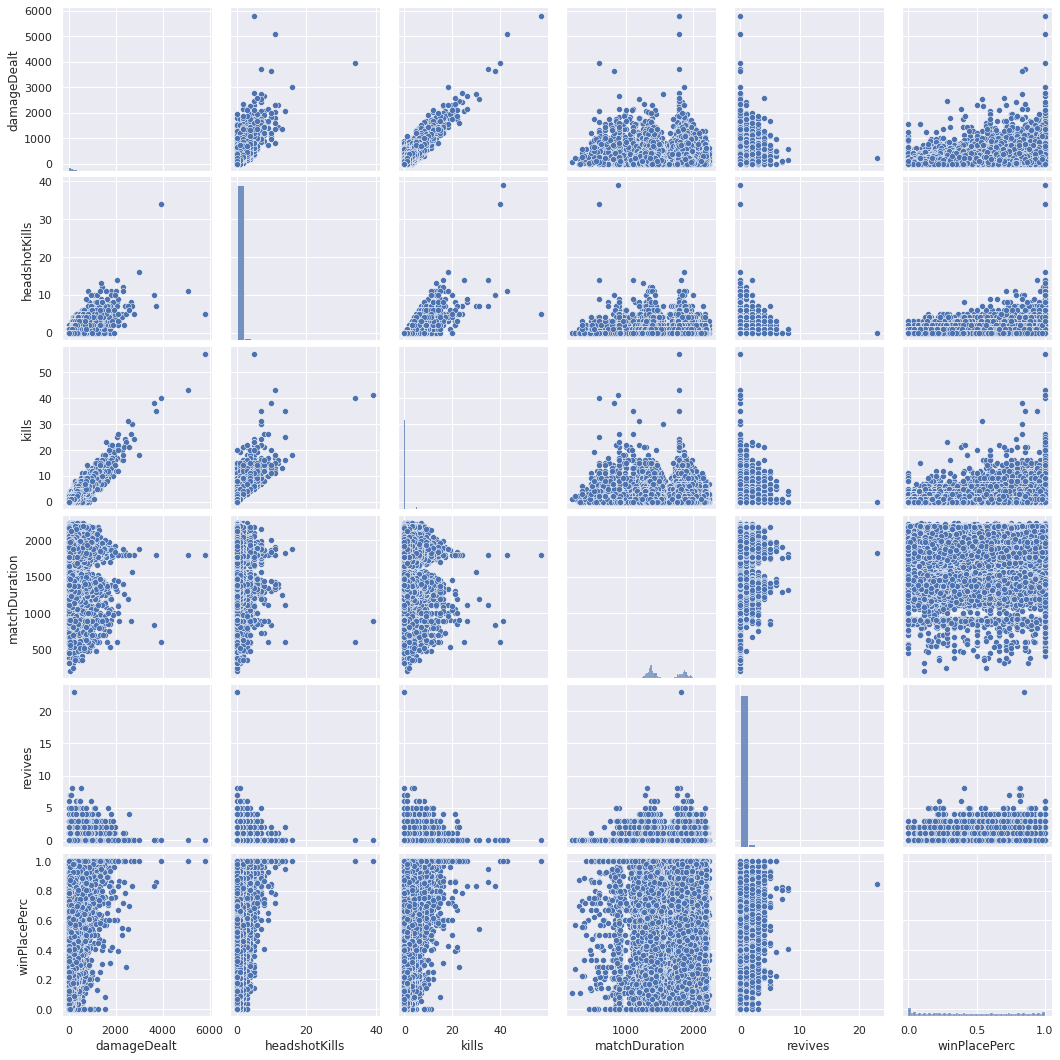

In [ ]:
cols = df[['damageDealt', 'headshotKills', 'kills', 'matchDuration', 'revives', 'winPlacePerc']]
sns.set()
sns.pairplot(cols)
plt.show()

**4.8 Distribución de variables numéricas**

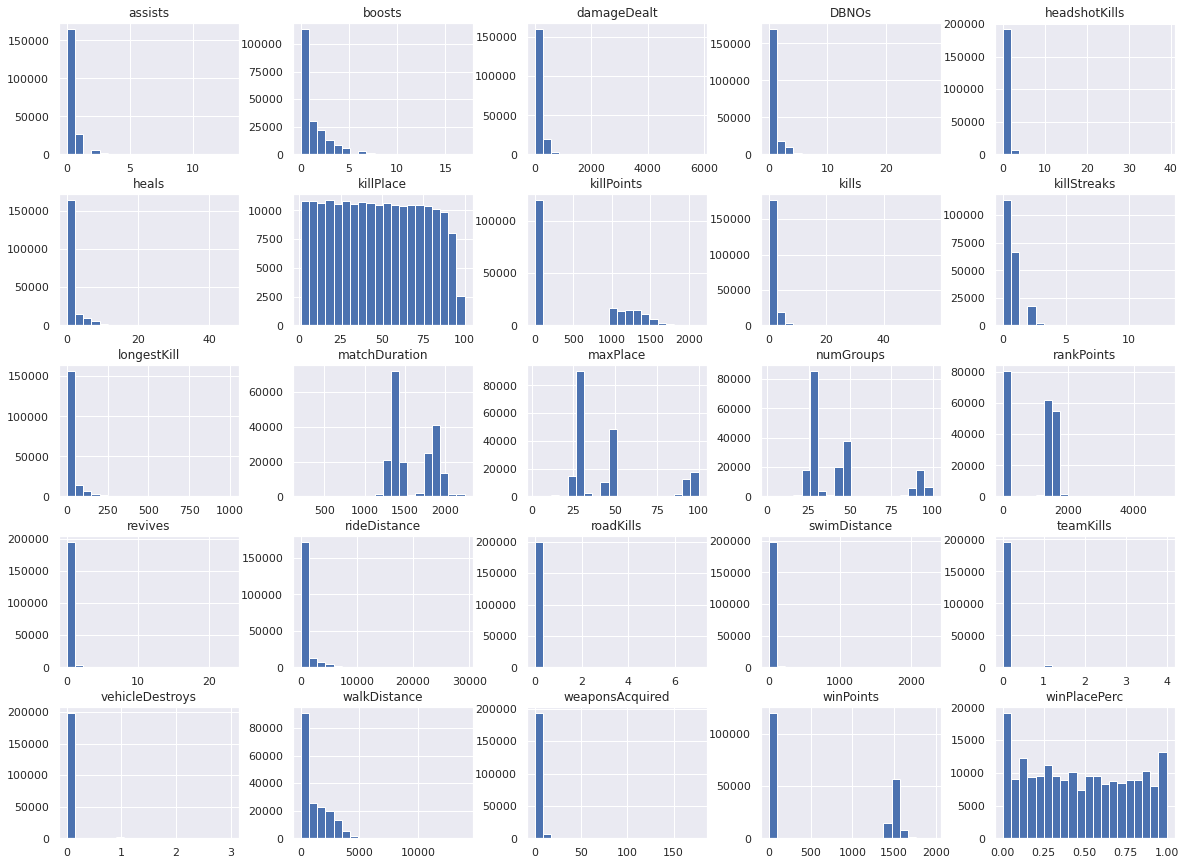

In [ ]:
df._get_numeric_data().hist(bins=20,figsize=(20,15))
plt.show()

**4.9 Correlación**

4.9.1 Gráfico de correlación entre todas las variables.

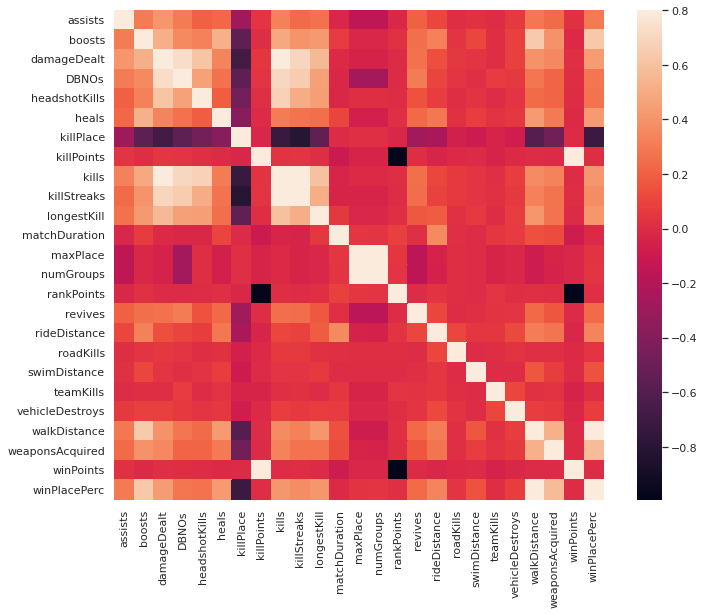

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

4.9.2 Valores de correlación entre todas las variables y la variable objetico winPlacePerc

In [ ]:
target_corr_df = pd.DataFrame(corrmat["winPlacePerc"].sort_values(ascending=False))
target_corr_df 

,winPlacePerc
winPlacePerc,1.000000
walkDistance,0.810308
boosts,0.634664
weaponsAcquired,0.572598
damageDealt,0.440375
heals,0.428850
kills,0.417856
longestKill,0.409437
killStreaks,0.376265
rideDistance,0.340665


In [ ]:
cols_poca_corr = []
for col, corr in zip(target_corr_df.index , target_corr_df.values ):
    if corr<0.1 and corr>-0.1:
        cols_poca_corr.append(col)

In [ ]:
cols_poca_corr

['vehicleDestroys',
 'numGroups',
 'roadKills',
 'maxPlace',
 'rankPoints',
 'teamKills',
 'killPoints',
 'winPoints',
 'matchDuration']